# Notebook 2 to play with differential equations


- Author : G. Sainton
- Date: 05/2020
- Version : 1.0


## Zombies apocalypse model

Based on WHEN ZOMBIES ATTACK !: MATHEMATICAL MODELLING OF AN OUTBREAK OF ZOMBIE INFECTION, Munz et al, 2009


Another example a little bit complicated based on a possible Zombies attack


### Basic model

$$\begin{equation}
  \begin{cases}
    S'=\Pi - \beta SZ-\delta S \\
    Z'=\beta SZ + \zeta R - \alpha SZ \\
    R'= \delta S + \alpha SZ - \zeta R
  \end{cases}
\end{equation}$$


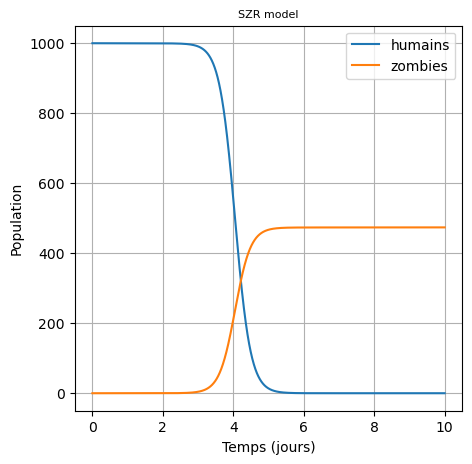

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


## Zombie apocalypse model
# https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html

# Constants
nb_jours = 10

Pi = 0         # birth rate
delta = 0.0001  # natural death percent (per day)
Beta = 0.0095   # transmission percent  (per day)
zeta = 0.0001   # resurect percent (per day)
Alpha = 0.005   # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def model_SZR(t, y):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # the model equations (see Munz et al. 2009)
    dS_dt = Pi - Beta*Si*Zi - delta*Si         
    dZ_dt =      Beta*Si*Zi + zeta*Ri - Alpha*Si*Zi   
    dR_dt = delta*Si + Alpha*Si*Zi - zeta*Ri      
    return [dS_dt, dZ_dt, dR_dt]

# Initial conditions
S0 = 1000.                    # initial population
Z0 = 0.                      # initial zombie population
R0 = 0.25                    # initial death population
y0 = [S0, Z0, R0]            # initial condition vector
t  = np.linspace(0, nb_jours, 10000)       # time grid

# solve the DEs
solution1 = solve_ivp(model_SZR, [t[0], t[-1]], y0, t_eval=t)

S1 = solution1.y[0]
Z1 = solution1.y[1]
R1 = solution1.y[2]

# plot results
plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.plot(t, S1, label='humains')
ax.plot(t, Z1, label='zombies')
ax.set_xlabel('Temps (jours)')
ax.set_ylabel('Population')
ax.set_title('SZR model', fontsize=8)
ax.legend(loc=0)
ax.grid()

plt.show()

###  Model with latent infection

"We now revise the model to include a latent class of infected individuals. As discussed in
Brooks [1], there is a period of time (approximately 24 hours) after the human susceptible
gets bitten before they succumb to their wound and become a zombie.
We thus extend the basic model to include the (more ‘realistic’) possibility that a sus-
ceptible individual becomes infected before succumbing to zombification. This is what is
seen quite often in pop-culture representations of zombies ([2, 6, 8]).
Changes to the basic model include:"

$$\begin{equation}
  \begin{cases}
    S'=\Pi - \beta SZ-\delta S \\
    I'= \beta SZ -\rho I -\delta I \\
    Z'=\rho I + \zeta R - \alpha SZ \\
    R'= \delta S + \delta I + \alpha SZ - \zeta R
  \end{cases}
\end{equation}$$


In [5]:

Pi = 0         # birth rate
delta = 0.0001  # natural death percent (per day)
Beta = 0.0095   # transmission percent  (per day)
zeta = 0.0001   # resurect percent (per day)
Alpha = 0.005   # destroy percent  (per day)
# Specific to SIZR
rho = 0.05      # latency of infection (in day fraction)


def model_SIZR(t, y):
    Si = y[0]
    Ii = y[1]
    Zi = y[2]
    Ri = y[3]
    # the model equations (see Munz et al. 2009)
    dS_dt = Pi - Beta*Si*Zi - delta*Si  
    dI_dt = Beta*Si*Zi + rho*Ii - delta*Ii       
    dZ_dt = rho*Ii + zeta*Ri - Alpha*Si*Zi   
    dR_dt = delta*Si + delta*Ii + Alpha*Si*Zi - zeta*Ri      
    return [dS_dt, dI_dt, dZ_dt, dR_dt]


# Initial conditions
S0 = 1000                     # initial population
I0 = 0.25
Z0 = 0                        # initial zombie population
R0 = 0.25  
y0 = [S0, I0, Z0, R0]         # initial condition vector

# solve the DEs
nb_jours = 500
t  = np.linspace(0, nb_jours, 10000)
solution1 = solve_ivp(model_SIZR, [t[0], t[-1]], y0, t_eval=t)

S1 = solution1.y[0]
I1 = solution1.y[1]
Z1 = solution1.y[2]
R1 = solution1.y[3]

# plot results
plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.plot(t, S1, label='humans')
ax.plot(t, Z1, label='zombies')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
ax.set_title('SIZR Model', fontsize=8)
ax.legend(loc=0)
ax.grid()

plt.show()

### The Model with Quarantine (SIZRQ)

"In order to contain the outbreak, we decided to model the effects of partial quarantine of
zombies. In this model, we assume that quarantined individuals are removed from the
population and cannot infect new individuals while they remain quarantined. Thus, the
changes to the previous model include:
- The quarantined area only contains members of the infected or zombie populations
(entering at rates $\kappa$ and $\sigma$ respectively).
- There is a chance some members will try to escape, but any that tried to would be
killed before finding their ‘freedom’ (parameter $\gamma$).
- These killed individuals enter the removed class and may later become reanimated as 'free' zombies"


$$\begin{equation}
  \begin{cases}
    S'=\Pi - \beta SZ-\delta S \\
    I'= \beta SZ -\rho I -\delta I -\kappa I\\
    Z'=\rho I + \zeta R - \alpha SZ - \sigma Z\\
    R'= \delta S + \delta I + \alpha SZ - \zeta R + \gamma Q \\
    Q'=\kappa I + \sigma Z - \gamma Q
  \end{cases}
\end{equation}$$


In [ ]:
Pi = 10       # birth rate
delta = 0.0001  # natural death percent (per day)
Beta = 0.095  # transmission percent  (per day)
zeta = 0.001  # resurect percent (per day)
Alpha = 0.005  # destroy percent  (per day)
rho = 0.025      # latency of infection (in day fraction)
kappa =0.01     # infected persons in quarantine
sigma = 0.01    # zombies in quarantine
gamma = 0.01    # people who try to escape quarantine

def model_SIZRQ(t, y):
    Si = y[0]
    Ii = y[1]
    Zi = y[2]
    Ri = y[3]
    Qi = y[4]
    # the model equations (see Munz et al. 2009) section 4 
    dS_dt = Pi - Beta*Si*Zi - delta*Si  
    dI_dt = Beta*Si*Zi + rho*Ii - delta*Ii - kappa*Ii   
    dZ_dt = rho*Ii + zeta*Ri - Alpha*Si*Zi - sigma*Zi  
    dR_dt = delta*Si + delta*Ii + Alpha*Si*Zi - zeta*Ri + gamma*Qi
    dQ_dt = kappa*Ii + sigma*Zi - gamma*Qi   
    return [dS_dt, dI_dt, dZ_dt, dR_dt, dQ_dt]


# Initial conditions
S0 = 500.                   # initial population
I0 = 0                      # initial zombie population
Z0 = 2                      # initial zombie population
R0 = 0.01 *S0               # initial death population
Q0 = 0                      # initial quarantine population
y0 = [S0, I0, Z0, R0, Q0]       # initial condition vector

# solve the DEs
solution1 = solve_ivp(model_SIZRQ, [t[0], t[-1]], y0, t_eval=t)

S1 = solution1.y[0]
I1 = solution1.y[1]
Z1 = solution1.y[2]
R1 = solution1.y[3]
Q1 = solution1.y[4]

# plot results
plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.plot(t, S1, label='humains')
ax.plot(t, Z1, label='zombies')
ax.set_xlabel('Temps (jours)')
ax.set_ylabel('Population')
ax.set_title('SIZRQ model', fontsize=8)
ax.legend(loc=0)
ax.grid()

plt.show()